In [1]:
import coffea
import hist
import pickle
from coffea import util
import matplotlib.pyplot as plt
import itertools

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-48_dawa5 because the default path (/home/cms-jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
fname1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/QCD/MediumBTag/2016/APV/TTbarRes_0l_UL16preVFP_QCD.coffea'
fname2 = 'CoffeaOutputsForCombine/Coffea_FirstRun/QCD/MediumBTag/2016/noAPV/TTbarRes_0l_UL16postVFP_QCD.coffea'

In [3]:
f1 = util.load(fname1)
f2 = util.load(fname2)

In [4]:
ttagcats = ["AT&Pt", "at", "pret", "0t", "1t", ">=1t", "2t", ">=0t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']                                                                                                          
anacats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
label_dict = {i: label for i, label in enumerate(anacats)}

In [5]:
for i,j in enumerate(anacats):
    print(i, j)

0 AT&Pt0bcen
1 AT&Pt0bfwd
2 AT&Pt1bcen
3 AT&Pt1bfwd
4 AT&Pt2bcen
5 AT&Pt2bfwd
6 at0bcen
7 at0bfwd
8 at1bcen
9 at1bfwd
10 at2bcen
11 at2bfwd
12 pret0bcen
13 pret0bfwd
14 pret1bcen
15 pret1bfwd
16 pret2bcen
17 pret2bfwd
18 0t0bcen
19 0t0bfwd
20 0t1bcen
21 0t1bfwd
22 0t2bcen
23 0t2bfwd
24 1t0bcen
25 1t0bfwd
26 1t1bcen
27 1t1bfwd
28 1t2bcen
29 1t2bfwd
30 >=1t0bcen
31 >=1t0bfwd
32 >=1t1bcen
33 >=1t1bfwd
34 >=1t2bcen
35 >=1t2bfwd
36 2t0bcen
37 2t0bfwd
38 2t1bcen
39 2t1bfwd
40 2t2bcen
41 2t2bfwd
42 >=0t0bcen
43 >=0t0bfwd
44 >=0t1bcen
45 >=0t1bfwd
46 >=0t2bcen
47 >=0t2bfwd


In [6]:
f1['ttbarmass_bare'].project("anacat", "ttbarmass")

Hist(
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], name='anacat', label='Analysis Category'),
  Regular(50, 800, 8000, name='ttbarmass', label='$m_{t\\bar{t}}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=1.42975e+07, variance=1.42975e+07) (WeightedSum(value=1.67167e+07, variance=1.67167e+07) with flow)

/tmp/ipykernel_18361/3835919464.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(icat+1)


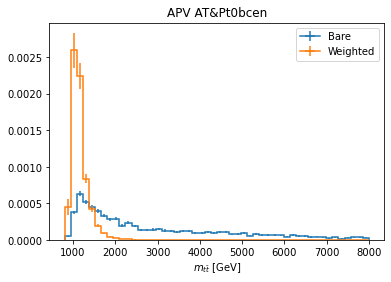

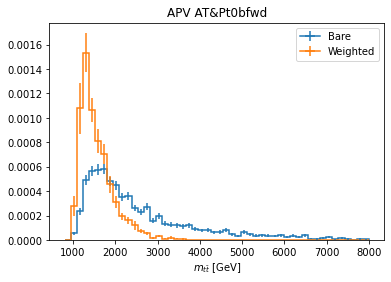

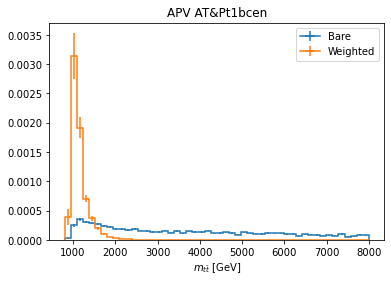

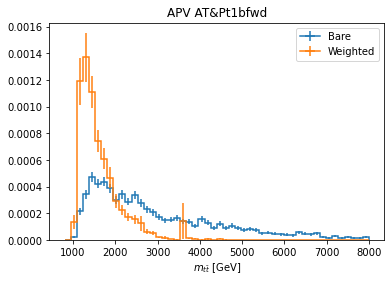

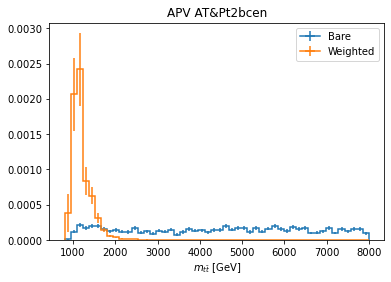

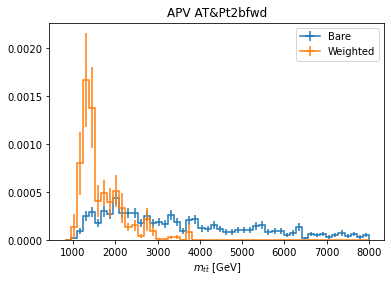

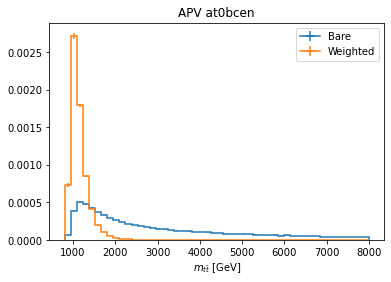

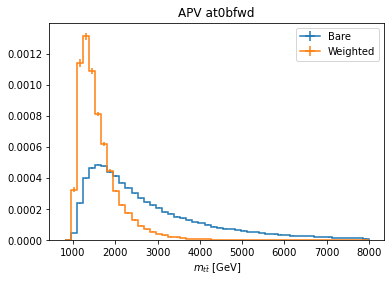

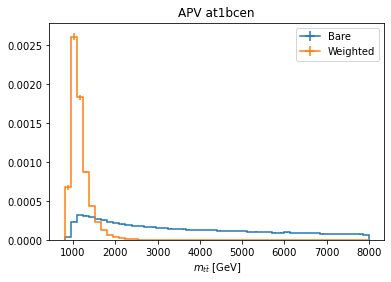

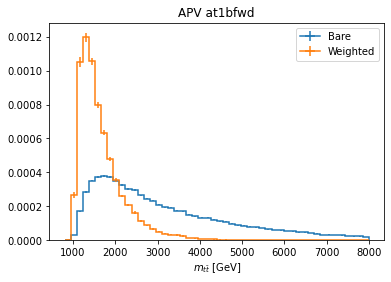

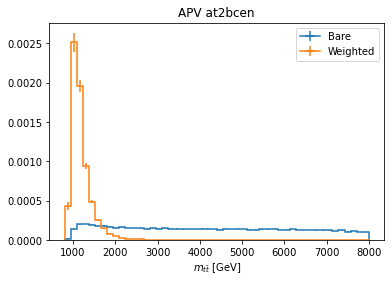

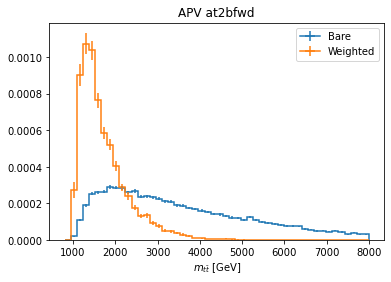

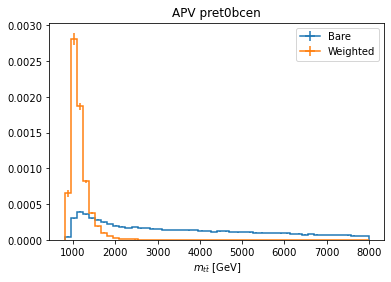

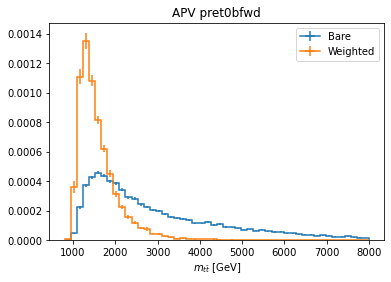

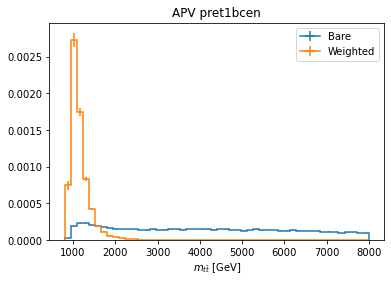

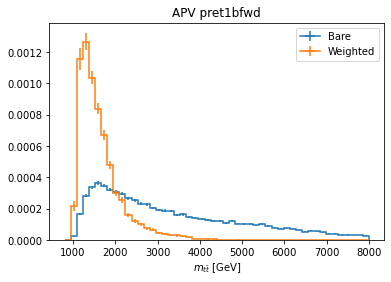

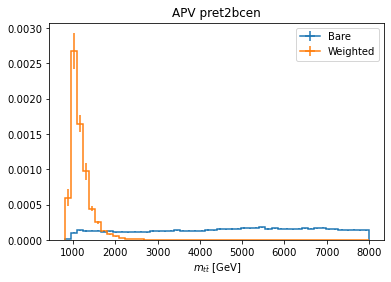

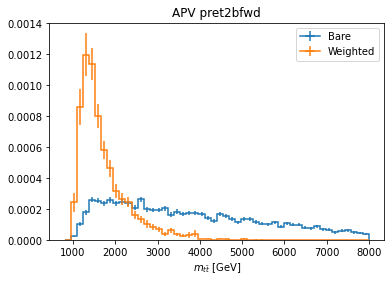

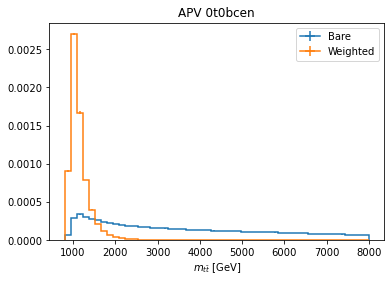

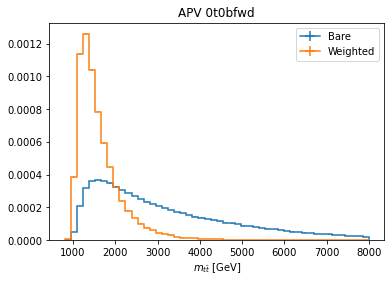

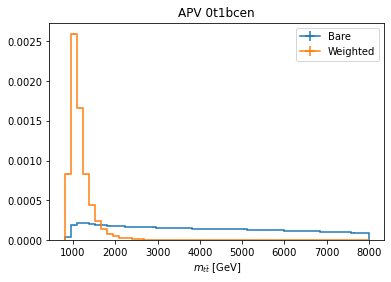

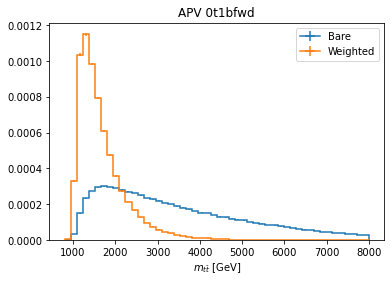

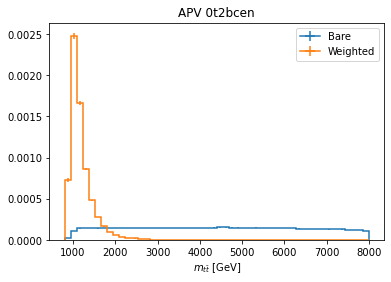

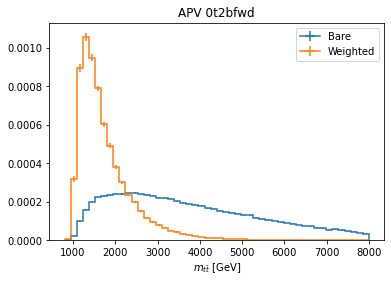

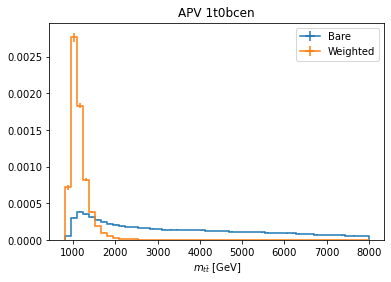

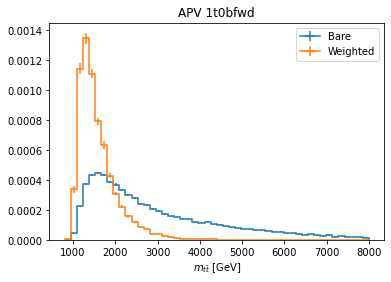

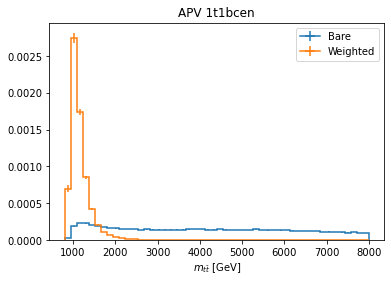

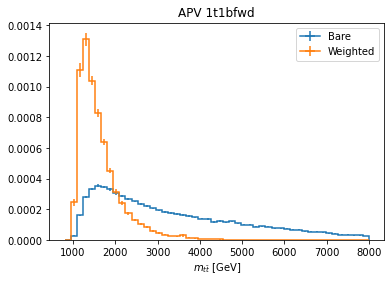

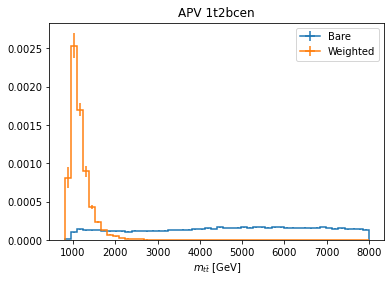

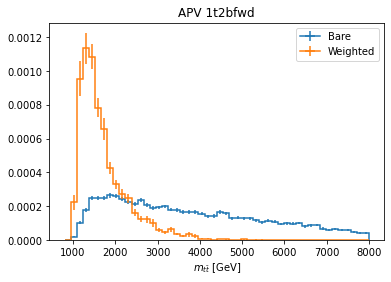

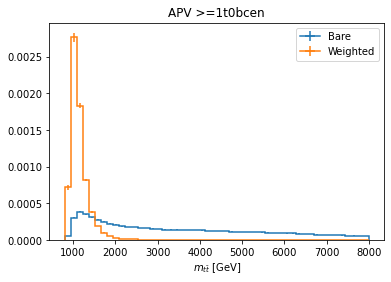

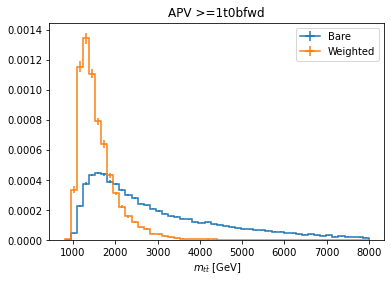

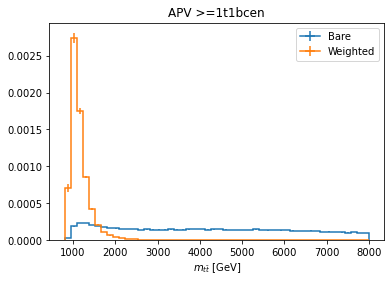

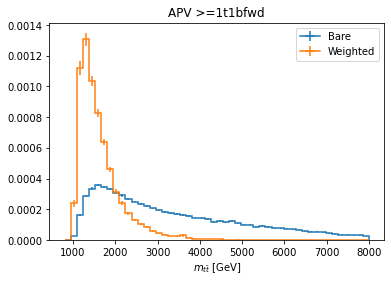

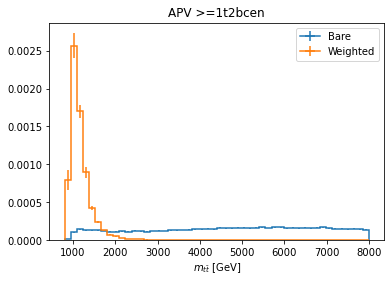

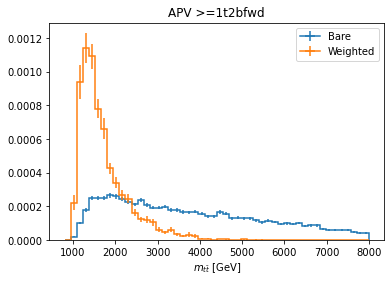

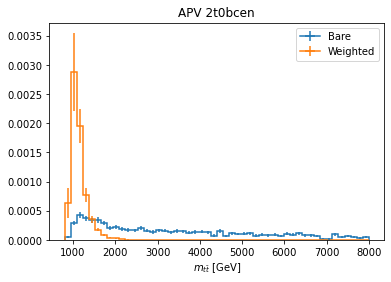

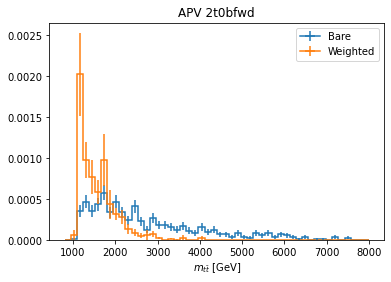

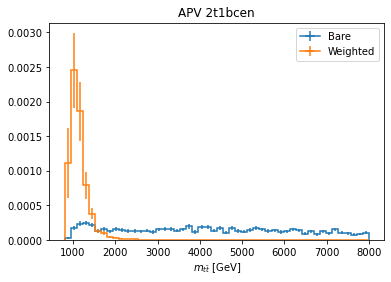

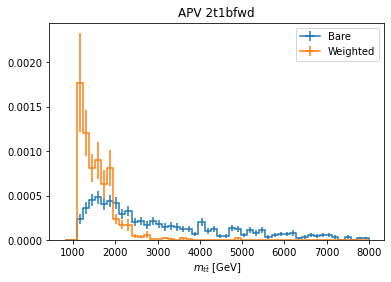

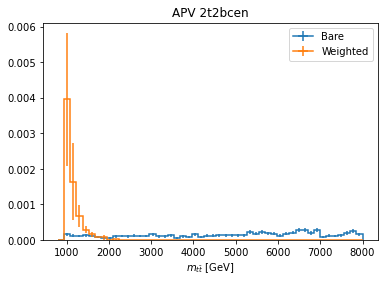

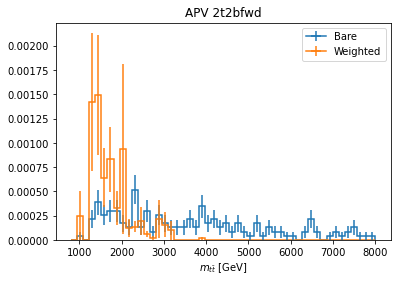

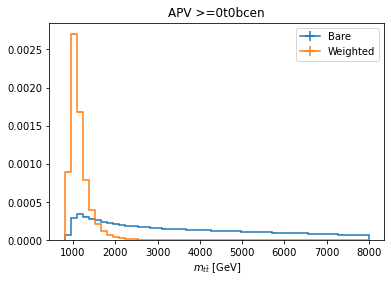

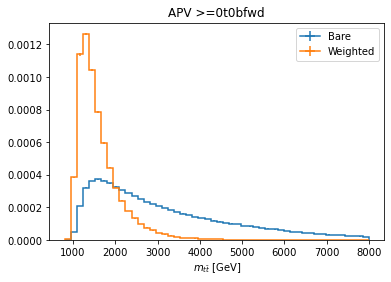

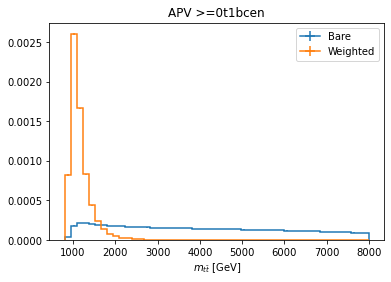

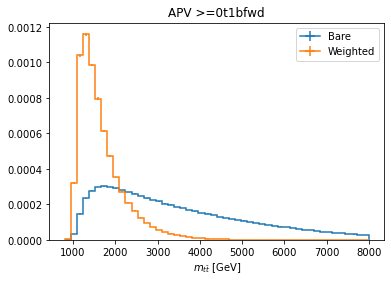

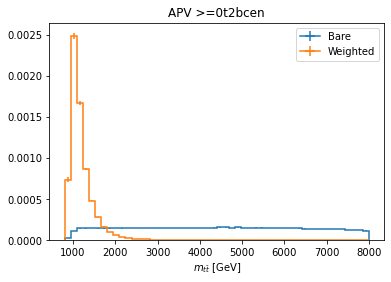

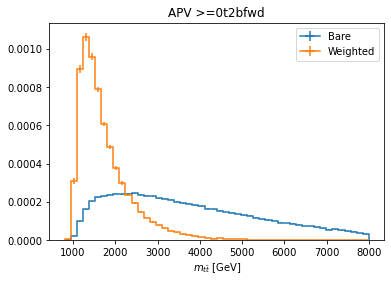

In [7]:
for icat in range(48):
    fig = plt.figure(icat+1)
    f1['ttbarmass_bare'].project("anacat", "ttbarmass")[icat,:].plot(density=True, label="Bare")
    f1['ttbarmass'].project("anacat", "ttbarmass")[icat,:].plot(density=True, label="Weighted")
    plt.title("APV " + anacats[icat])
    plt.legend()
    plt.savefig("apv_"+anacats[icat] +".png")

/tmp/ipykernel_18361/2668034699.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(10 + icat+1)


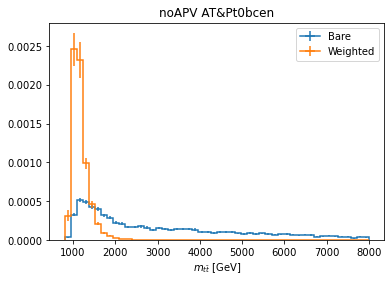

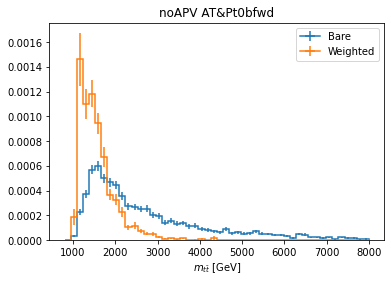

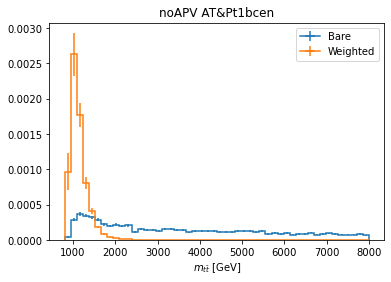

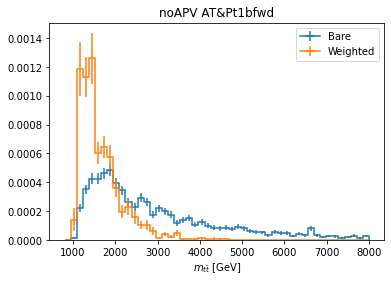

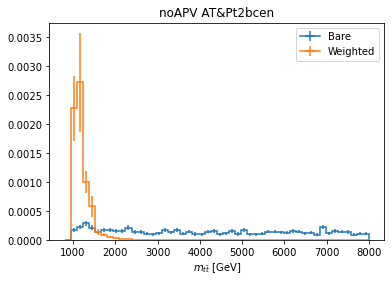

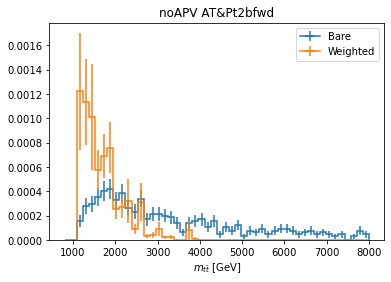

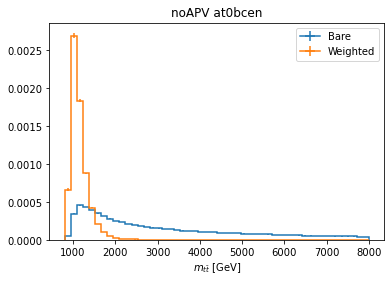

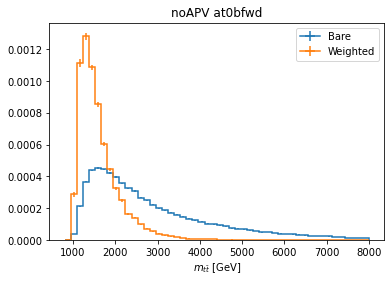

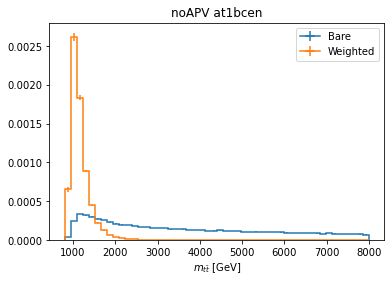

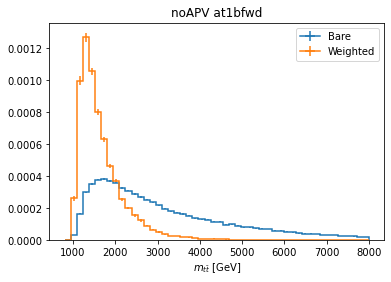

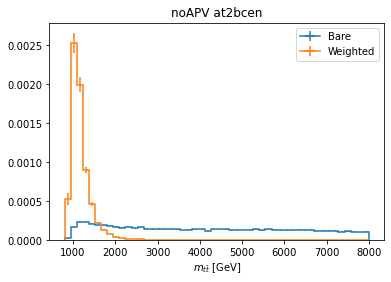

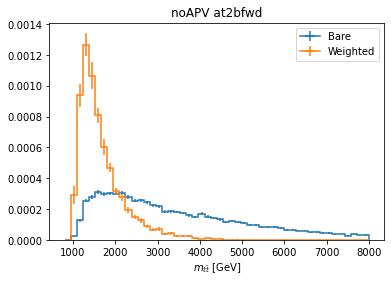

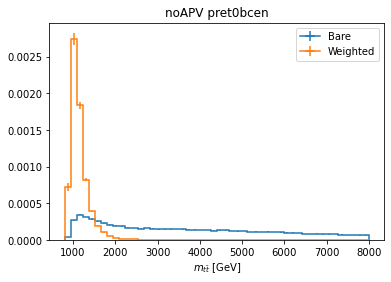

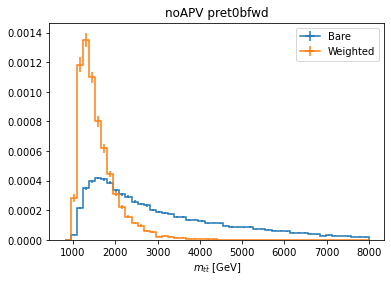

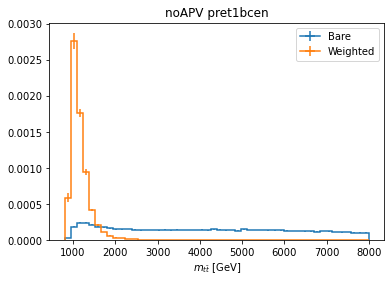

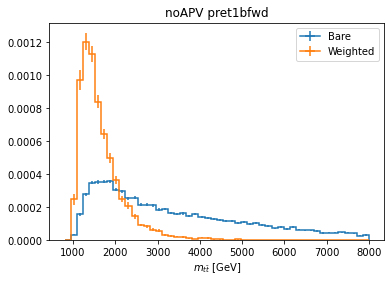

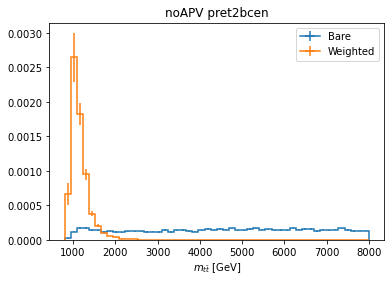

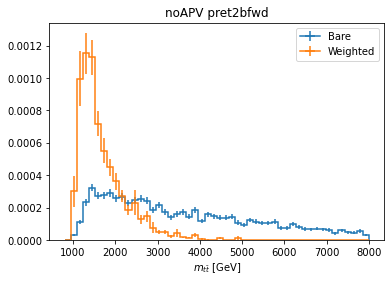

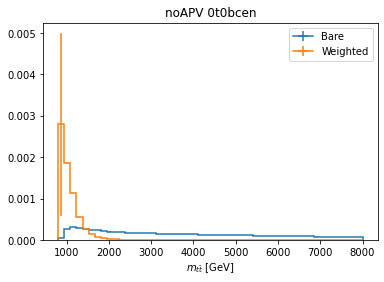

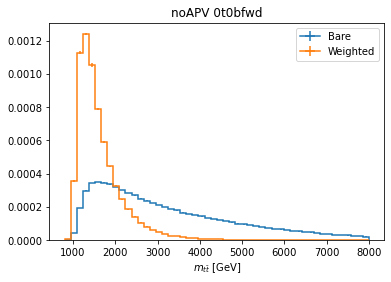

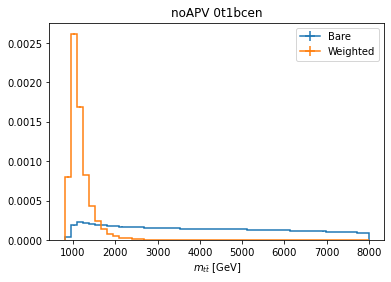

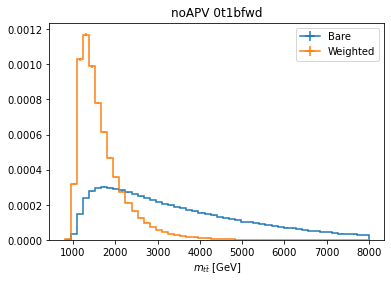

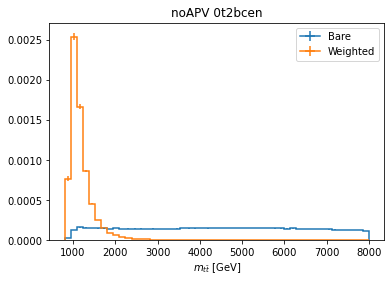

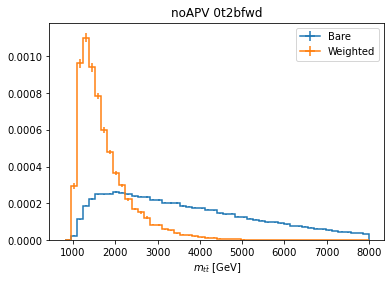

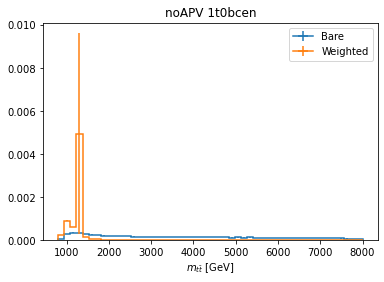

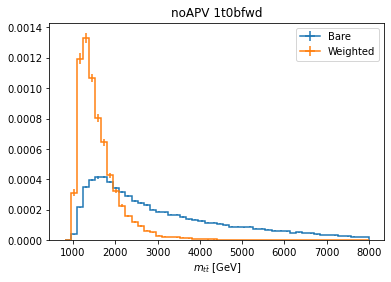

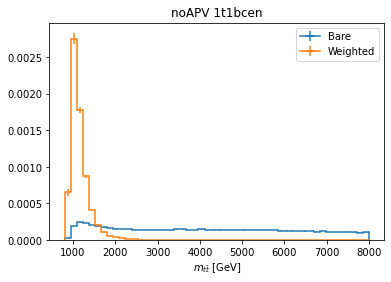

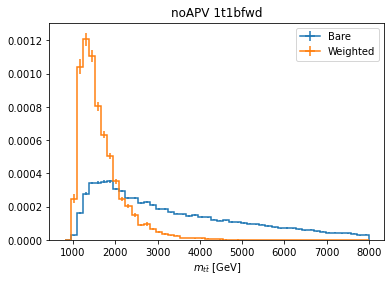

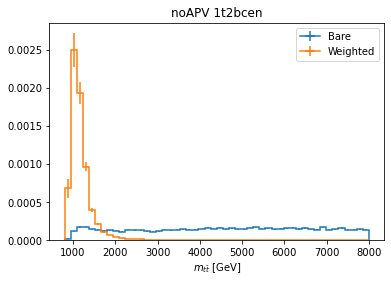

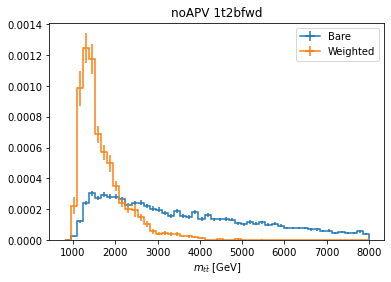

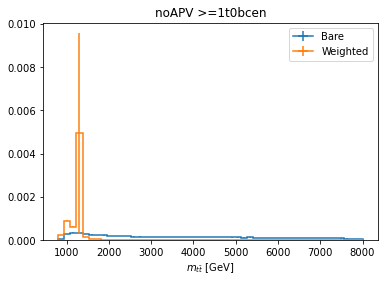

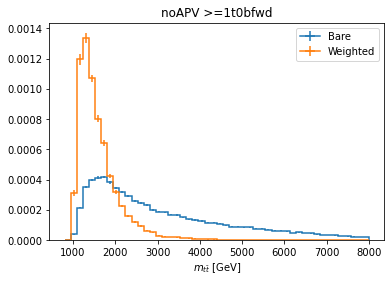

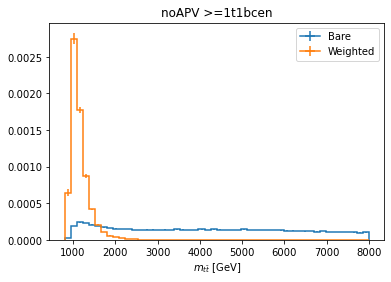

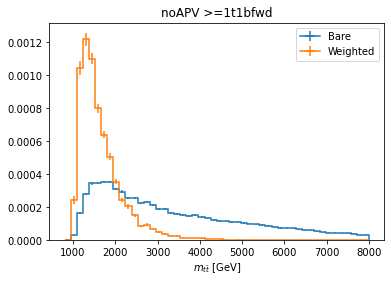

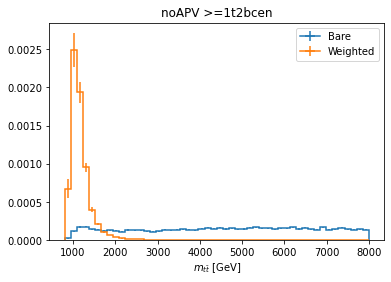

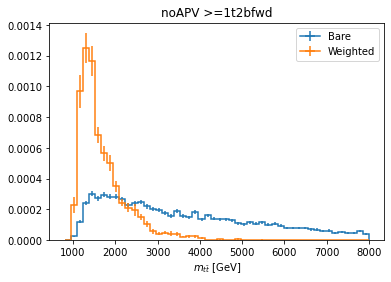

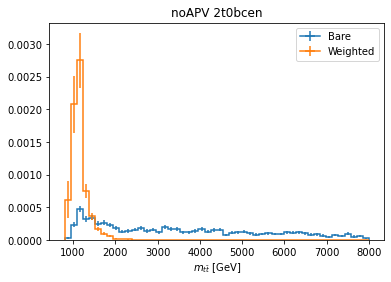

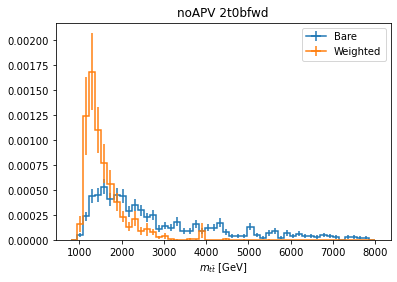

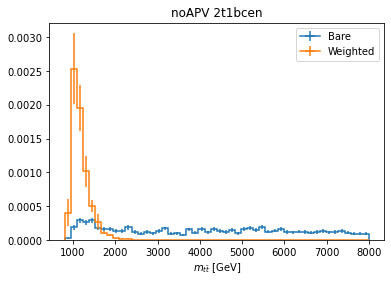

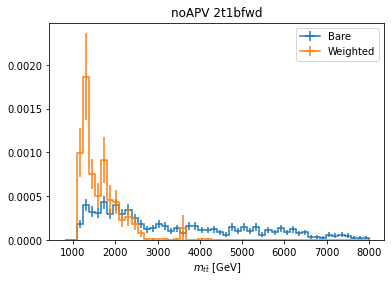

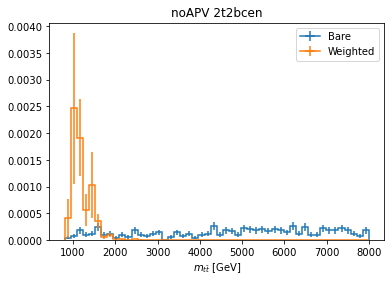

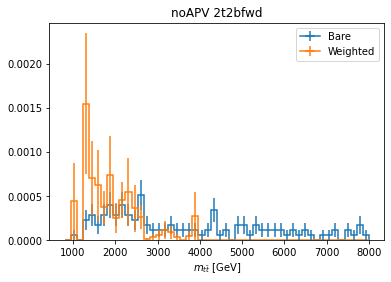

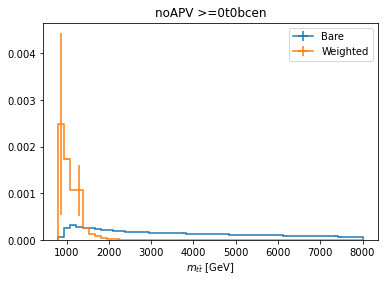

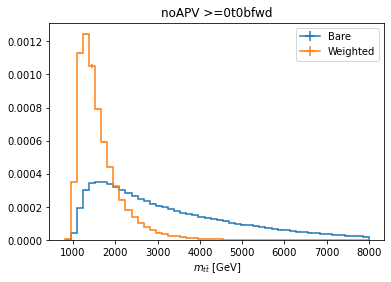

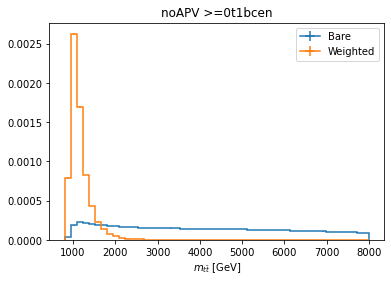

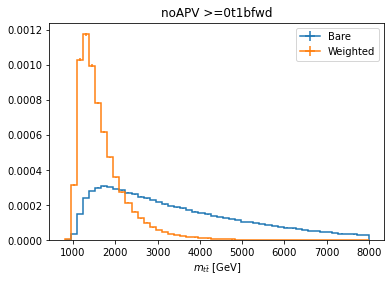

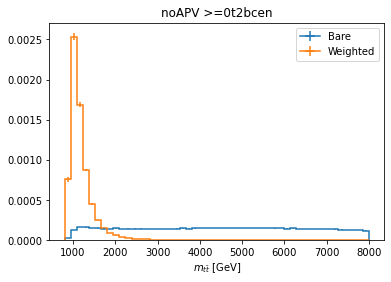

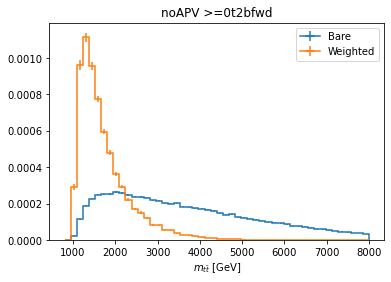

In [8]:
for icat in range(48):
    fig = plt.figure(10 + icat+1)    
    f2['ttbarmass_bare'].project("anacat", "ttbarmass")[icat,:].plot(density=True, label="Bare")
    f2['ttbarmass'].project("anacat", "ttbarmass")[icat,:].plot(density=True, label="Weighted")
    plt.title("noAPV " + anacats[icat])
    plt.legend()
    plt.savefig("noapv_"+anacats[icat] +".png")

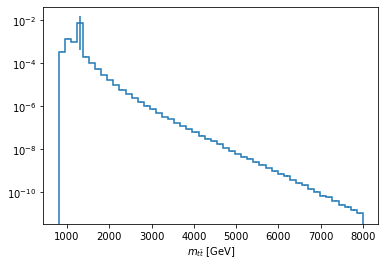

In [9]:
f2['ttbarmass'].project("anacat", "ttbarmass")[24,:].plot()
plt.yscale("log")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f692ab2cfd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

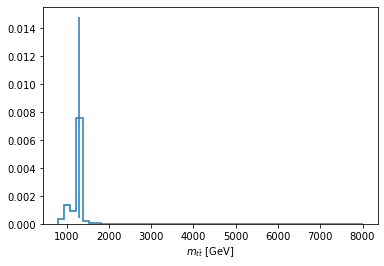

In [10]:
f2['ttbarmass'].project("anacat", "ttbarmass")[24,:].plot()

In [11]:
f2['ttbarmass'].project("anacat", "ttbarmass")[24,:].axes.edges

(array([ 800.,  944., 1088., 1232., 1376., 1520., 1664., 1808., 1952.,
        2096., 2240., 2384., 2528., 2672., 2816., 2960., 3104., 3248.,
        3392., 3536., 3680., 3824., 3968., 4112., 4256., 4400., 4544.,
        4688., 4832., 4976., 5120., 5264., 5408., 5552., 5696., 5840.,
        5984., 6128., 6272., 6416., 6560., 6704., 6848., 6992., 7136.,
        7280., 7424., 7568., 7712., 7856., 8000.]))

In [12]:
f2['ttbarmass'].project("anacat", "ttbarmass")[24,:].values()

array([3.42734316e-04, 1.36994751e-03, 9.31159751e-04, 7.60581880e-03,
       2.02730545e-04, 1.00213568e-04, 5.13936709e-05, 2.84759038e-05,
       1.66293840e-05, 9.41910121e-06, 5.92075245e-06, 3.72758716e-06,
       2.37102435e-06, 1.49478619e-06, 1.05996113e-06, 7.02997511e-07,
       4.76926181e-07, 3.18407514e-07, 2.47360484e-07, 1.64847952e-07,
       1.20563967e-07, 8.39089309e-08, 6.05594408e-08, 4.30218439e-08,
       3.04037413e-08, 2.31399039e-08, 1.65536942e-08, 1.13960350e-08,
       7.90226511e-09, 5.97853196e-09, 4.44107062e-09, 3.57127992e-09,
       2.45552854e-09, 1.87245680e-09, 1.32824619e-09, 9.37832940e-10,
       7.28826857e-10, 5.63450802e-10, 3.68473490e-10, 2.55160751e-10,
       2.05594199e-10, 1.37728378e-10, 1.06259327e-10, 6.70896966e-11,
       5.66967299e-11, 3.96021622e-11, 2.65374419e-11, 2.12613241e-11,
       1.53310710e-11, 1.01720853e-11])

In [13]:
f1['ttbarmass'].project("anacat", "ttbarmass")[24,:].values()

array([3.35505611e-04, 1.29152452e-03, 8.56168839e-04, 3.84396883e-04,
       1.78176266e-04, 8.98298157e-05, 4.70933495e-05, 2.47520898e-05,
       1.43259879e-05, 7.83206785e-06, 4.79714373e-06, 3.21336111e-06,
       2.00999896e-06, 1.33649190e-06, 8.84427962e-07, 5.76198338e-07,
       3.86747110e-07, 2.65895077e-07, 1.96634340e-07, 1.35538245e-07,
       9.37396579e-08, 7.04227140e-08, 4.65720921e-08, 3.42582325e-08,
       2.28585871e-08, 1.81412253e-08, 1.30567460e-08, 9.24503744e-09,
       6.28988577e-09, 4.82213441e-09, 3.62972274e-09, 2.71588613e-09,
       1.84126190e-09, 1.44011226e-09, 1.04010341e-09, 7.36438923e-10,
       5.12118669e-10, 3.91723294e-10, 2.85570403e-10, 1.98953545e-10,
       1.43632073e-10, 1.00622259e-10, 6.79955442e-11, 5.77424109e-11,
       3.75514998e-11, 2.71890586e-11, 2.03126922e-11, 1.43757954e-11,
       1.04589041e-11, 7.70071279e-12])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f68ad79dd00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

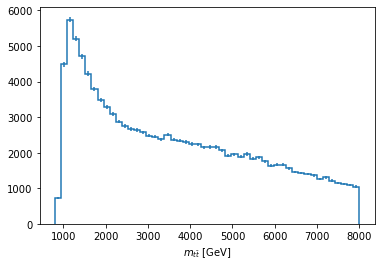

In [14]:
f2['ttbarmass_bare'].project("anacat", "ttbarmass")[24,:].plot()